<a href="https://colab.research.google.com/github/weltonlopesdev/A3---Algoritimo-KMeans/blob/main/Clustering_Kmeans_A3_Categorias_de_PIZZA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## TRABALHO A3 - INTELIGÊNCIA ARTIFICIAL - UTILIZANDO O ALGORITIMO K.MEANS

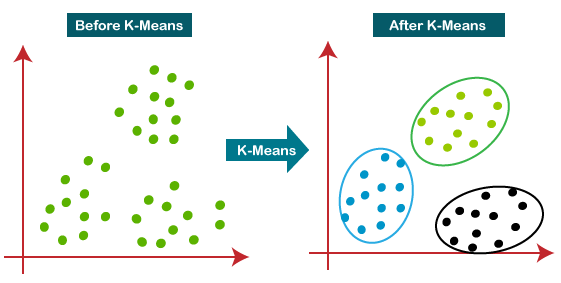

Levantamento da Bibliografia. Definição dos dados, variáveis e metodologia



**bibliografia:**

https://repositorio-api.fei.edu.br/server/api/core/bitstreams/7be090ad-8ad7-403f-b1fb-f03a9652bb5e/content

https://edisciplinas.usp.br/pluginfile.php/4461141/mod_resource/content/1/Aula21_Agrupamento_kmeans.pdf

https://scikit-learn.org/stable/modules/generated/sklearn.cluster.KMeans.html

https://realpython.com/k-means-clustering-python/


**Definição dos dados:**

Tipos de Pizza:

**variáveis:** nome da pizza, categoria, ingredientes, price, tamanho

**metodologia:** elbow(seleção de clusters)(welton), normalização de dados(ryan), exploração analitica(alexandre e lucas), avaliação de resultados obtidos.(andre)

# Importando as bibliotecas necessárias

In [212]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [213]:
pip install scikit-learn

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [214]:
pip install matplotlib

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [215]:
import pandas as pd
import numpy as np
from datetime import datetime
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from sklearn import preprocessing
from sklearn.cluster import KMeans
from IPython.display import Image
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.gridspec import GridSpec
from functools import reduce
import pickle
import warnings
warnings.filterwarnings("ignore")

In [216]:
df = pd.read_excel('/content/drive/MyDrive/Colab Notebooks/DataModelPizzaSales.xlsx')

# Variaveis

Será utilizada:

  

> **pizza_name:** variavel categorica

> **pizza_category:** variavel categorica

> **pizza_ingredients:** variavel categorica

> **total_price:** variavel numerica

> **pizza_size:** variavel categorica











**Diferença entre variavel categorica e variavel numerica**

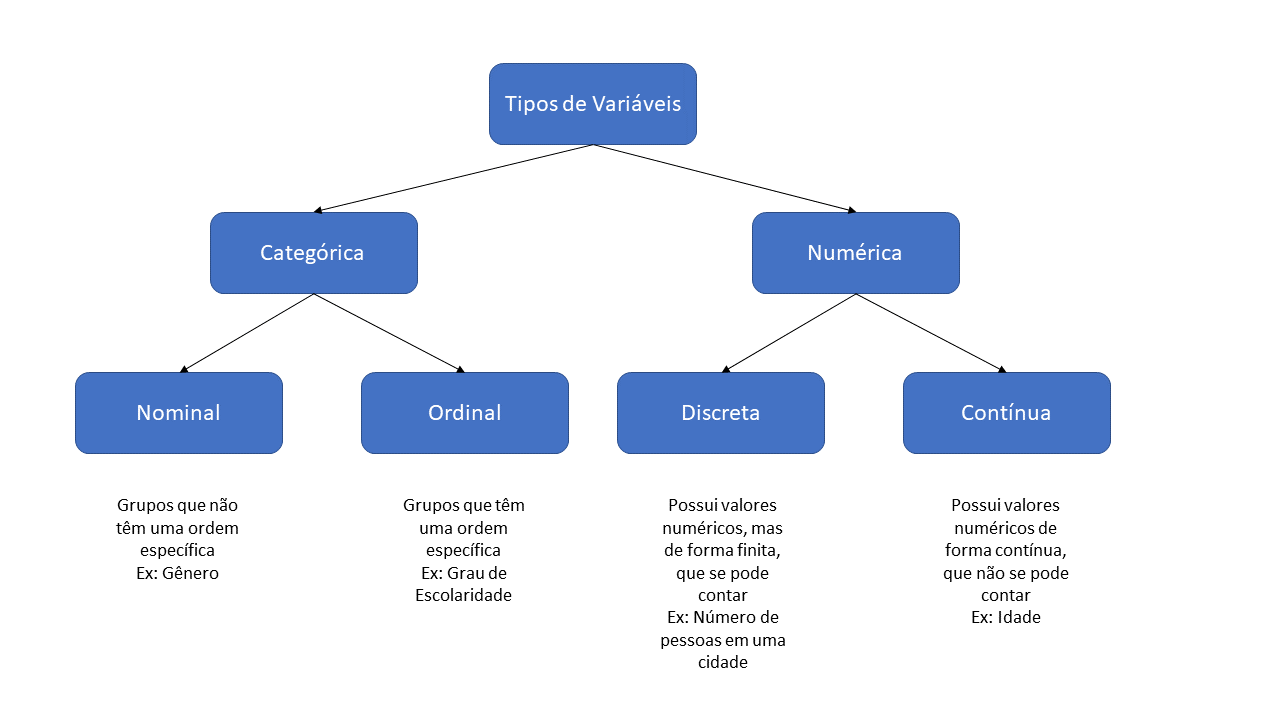

In [217]:
Image(filename='/content/drive/MyDrive/Colab Notebooks/Tipos+de+Variáveis.png', width=900, height=600)

In [218]:
df.columns#mostrando todas as colunas

Index(['order_details_id', 'order_id', 'pizza_id', 'quantity', 'order_date',
       'order_time', 'unit_price', 'total_price', 'pizza_size',
       'pizza_category', 'pizza_ingredients', 'pizza_name'],
      dtype='object')

# Analise dos Dados e normalização


**função para mostrar se existe valores NULOS**

In [219]:
def show_null(df): #função para mostrar os dados null
  null_columns = (df.isnull().sum(axis=0)/len(df)).sort_values(ascending=False).index #somar todos os nulos do dataframe no eixo 0 de forma crescente
 
  null_data = pd.concat([df.isnull().sum(axis=0), #todos os valores nulos das colunas
                         (df.isnull().sum(axis=0)/len(df)).sort_values(ascending=False), #pegar as porcentagens nulas
                         df.loc[:, df.columns.isin(list(null_columns))].dtypes], axis=1) #pegar os tipos
                         
  null_data = null_data.rename(columns={0: '#', 1: '% null', 2: 'type'}).sort_values(ascending=False, by='% null') #Dando nomes a coluna com rename

  return null_data

**chamada da função**

In [220]:
show_null(df)  #chamada da função (nenhum valor nulo)

,#,% null,type
order_details_id,0,0.0,int64
order_id,0,0.0,int64
pizza_id,0,0.0,object
quantity,0,0.0,int64
order_date,0,0.0,datetime64[ns]
order_time,0,0.0,object
unit_price,0,0.0,float64
total_price,0,0.0,float64
pizza_size,0,0.0,object
pizza_category,0,0.0,object


**Função para mostrar uma variavel numerica**

In [221]:
def plot_num(df, feature):#plotando uma variavel numerica
  fig = plt.figure(figsize=(12,8))
  gs = GridSpec(1,2)
  sns.boxplot(y=feature, data=df, color='firebrick', ax=fig.add_subplot(gs[0,0]))
  plt.ylabel(feature)
  sns.stripplot(y=df[feature], color='darkcyan', ax=fig.add_subplot(gs[0,1]))
  plt.ylabel(None)
  plt.show()


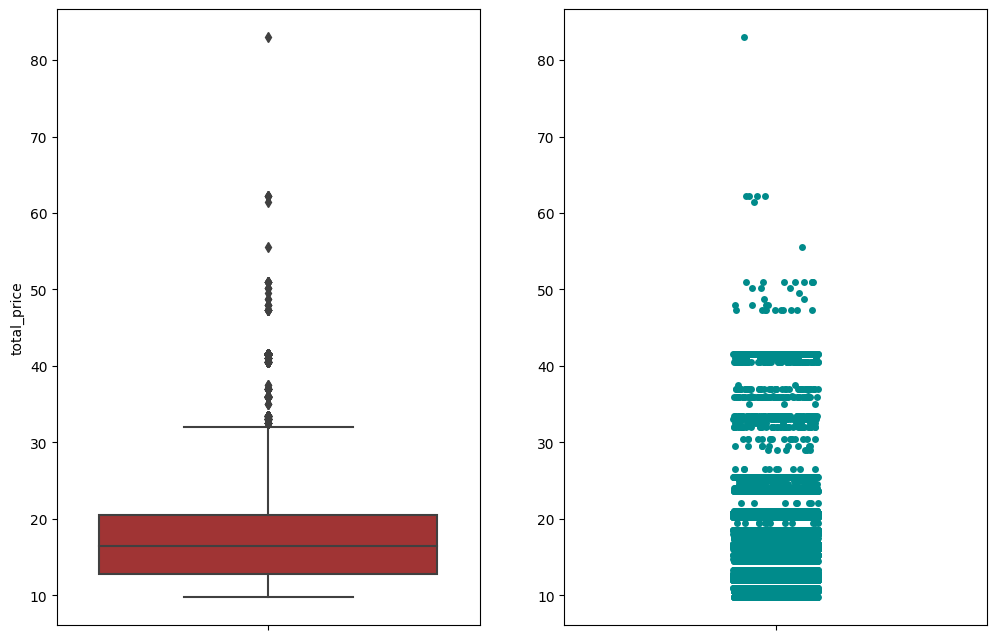

In [222]:
plot_num(df, 'total_price') #chamada da função plot_num mostrando a var numerica

**Função para mostrar uma variavel categorica**

In [223]:
def plot_cat(df, feature):#plotando uma variavel categorica
  fig = plt.figure(figsize=(12,8))
  ax = sns.countplot(data=df, x=feature)

  plt.xlabel(feature)
  plt.ylabel('Variavel categorica')
  plt.show()

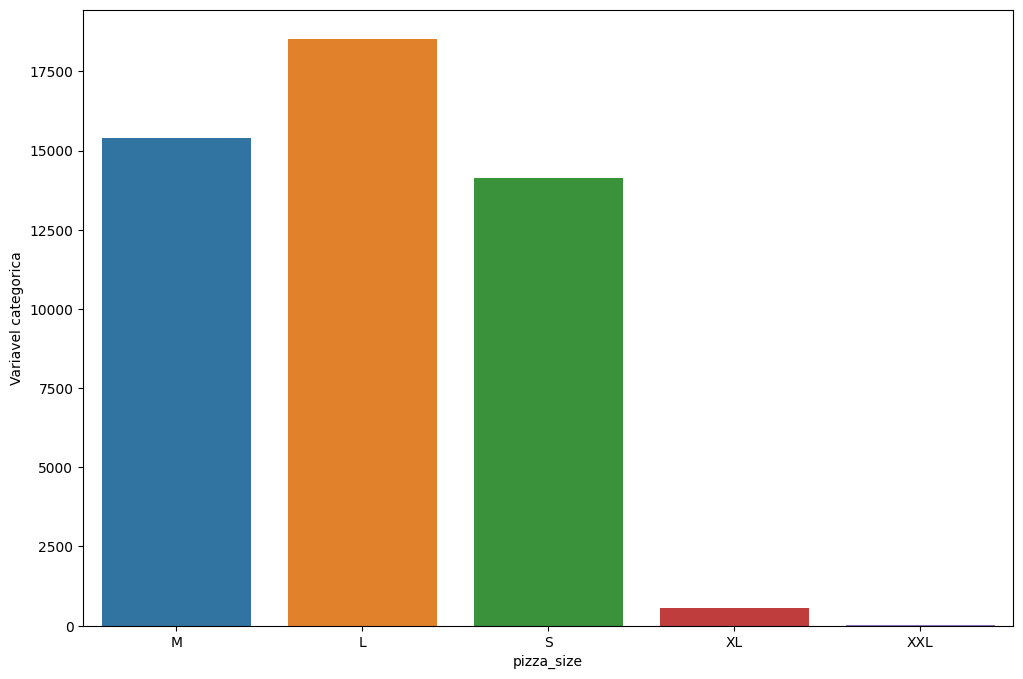

In [224]:
plot_cat(df, 'pizza_size')  #chamada da função plot_cat para mostrar a variavel categorica pizza size

**Variaveis que serão padronizados:** 

> nome da pizza

> categoria

> ingredientes

>  price

> tamanho











In [225]:
df.head()

,order_details_id,order_id,pizza_id,quantity,order_date,order_time,unit_price,total_price,pizza_size,pizza_category,pizza_ingredients,pizza_name
0,1,1,hawaiian_m,1,2015-01-01,11:38:36,13.25,13.25,M,Classic,"Sliced Ham, Pineapple, Mozzarella Cheese",The Hawaiian Pizza
1,2,2,classic_dlx_m,1,2015-01-01,11:57:40,16.00,16.00,M,Classic,"Pepperoni, Mushrooms, Red Onions, Red Peppers,...",The Classic Deluxe Pizza
2,3,2,five_cheese_l,1,2015-01-01,11:57:40,18.50,18.50,L,Veggie,"Mozzarella Cheese, Provolone Cheese, Smoked Go...",The Five Cheese Pizza
3,4,2,ital_supr_l,1,2015-01-01,11:57:40,20.75,20.75,L,Supreme,"Calabrese Salami, Capocollo, Tomatoes, Red Oni...",The Italian Supreme Pizza
4,5,2,mexicana_m,1,2015-01-01,11:57:40,16.00,16.00,M,Veggie,"Tomatoes, Red Peppers, Jalapeno Peppers, Red O...",The Mexicana Pizza


Decodificando as variaveis categoricas

**Variavel pizza_size**

In [226]:
#decodificando a variavel pizza_size
df.pizza_size = df.pizza_size.apply(lambda x: 0 if x=='M' 
                       else(1 if x=='L' 
                            else(2 if x=='S' 
                                 else(3 if x=='XL' 
                                      else(4 if x=='XXL' else None)))))

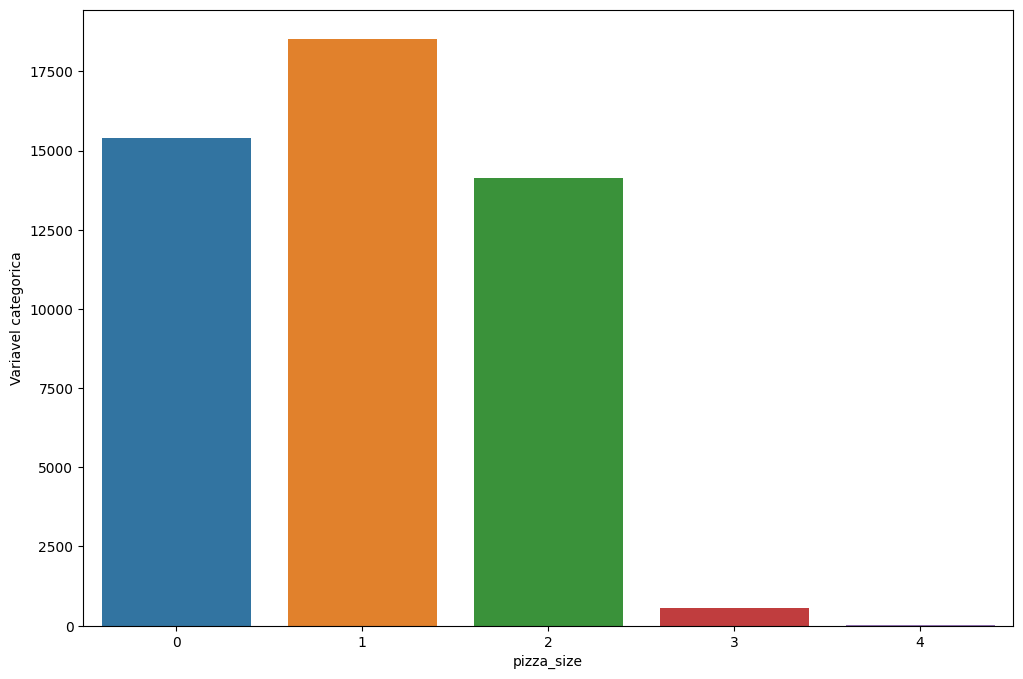

In [227]:
plot_cat(df, 'pizza_size')

**Variavel pizza_name**

In [228]:
le = LabelEncoder()

In [229]:
#decodificando a variavel pizza_name
df.pizza_name = le.fit_transform(df.pizza_name)

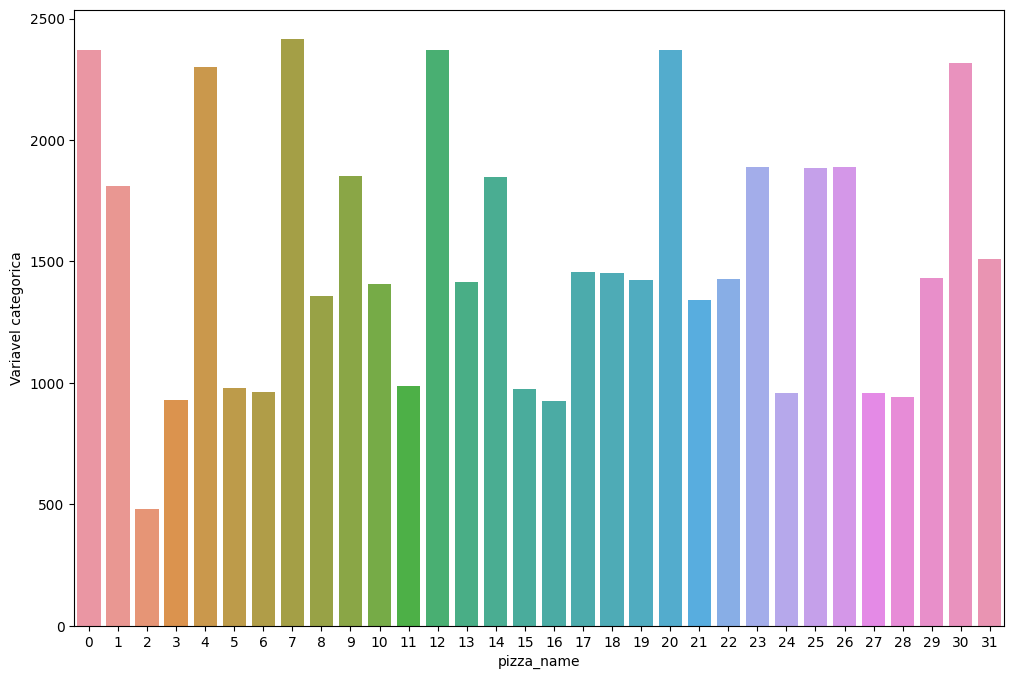

In [230]:
plot_cat(df, 'pizza_name')

**Variavel pizza ingredients**

In [231]:
 #decodificando a variavel pizza_ingredients
df.pizza_ingredients = le.fit_transform(df.pizza_ingredients)

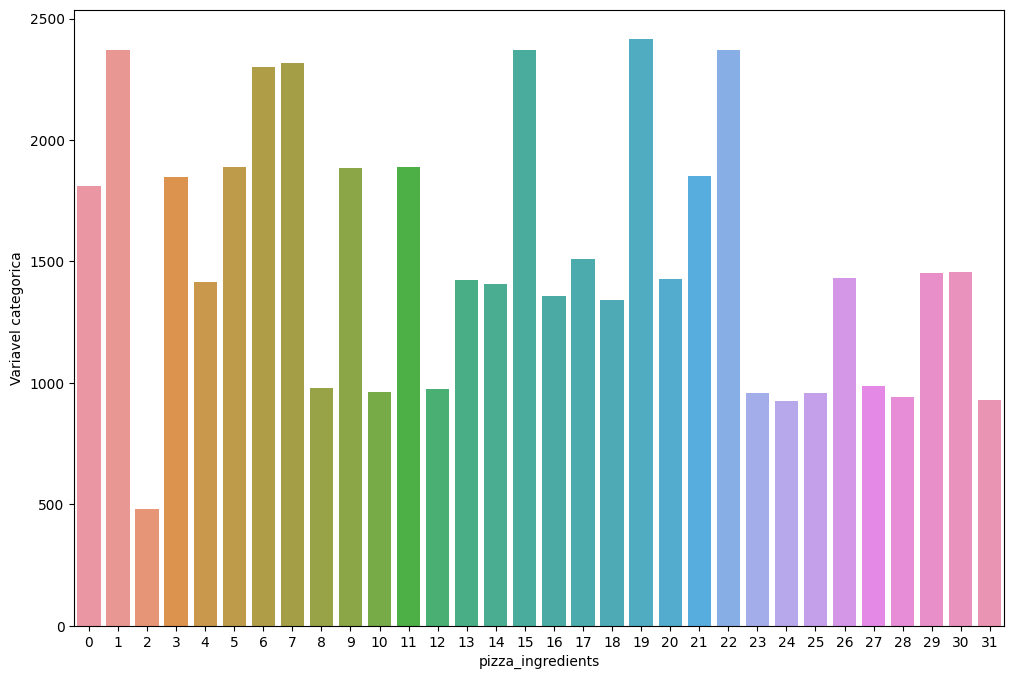

In [232]:
plot_cat(df, 'pizza_ingredients')

**Variavel Pizza categoria**

In [233]:
#decodificando a variavel pizza_category
df.pizza_category = le.fit_transform(df.pizza_category)

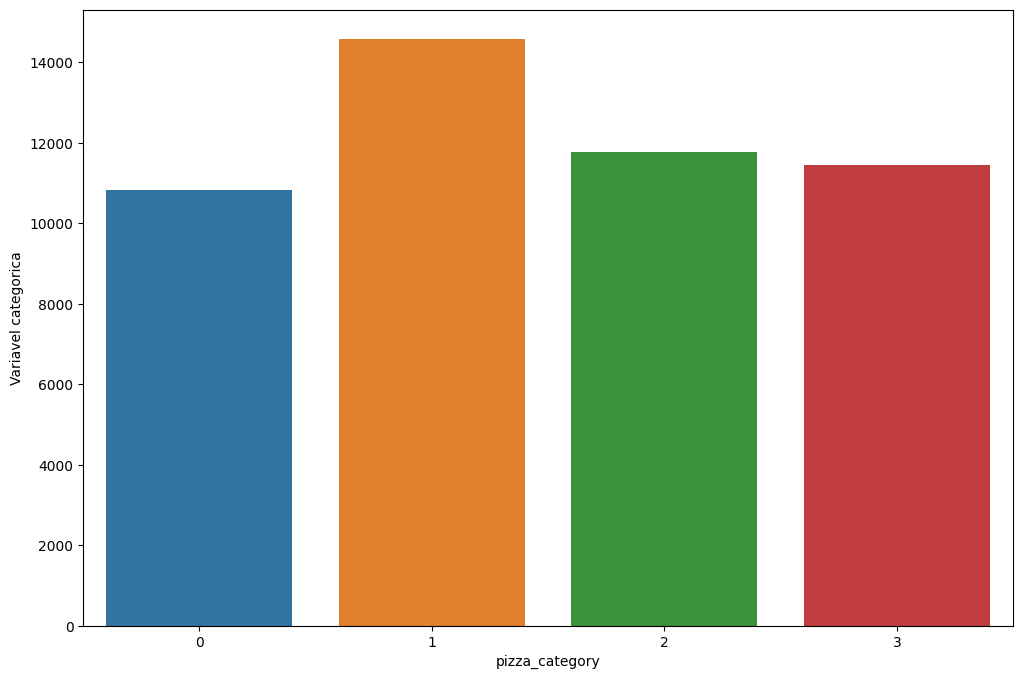

In [234]:
plot_cat(df, 'pizza_category')

**Variavel pizza price**

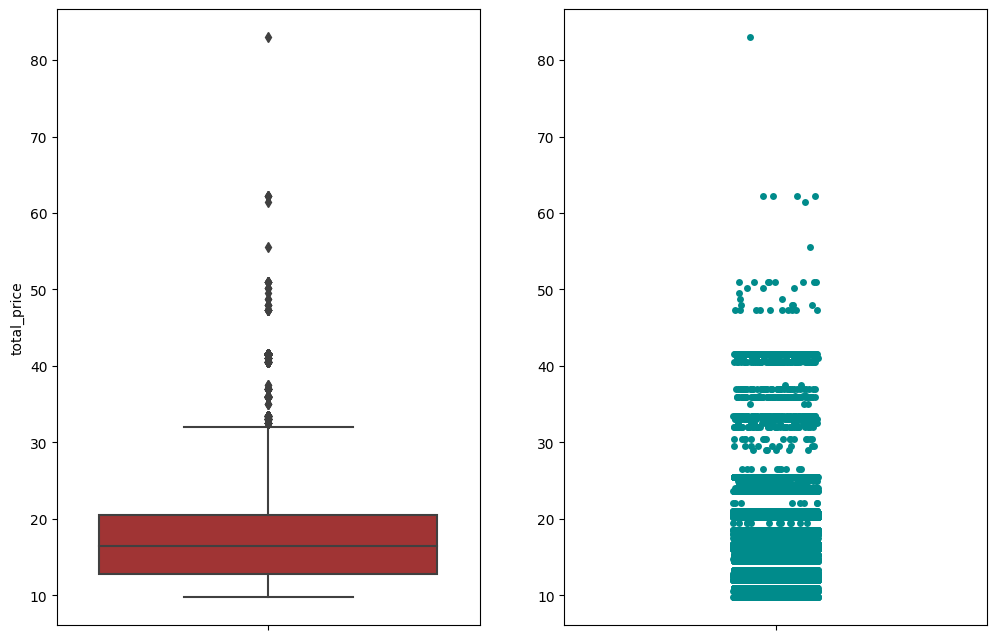

In [235]:
plot_num(df, 'total_price')

**Variavel id pizza**

In [239]:
df.pizza_id = le.fit_transform(df.pizza_id)

In [236]:
df.head()

,order_details_id,order_id,pizza_id,quantity,order_date,order_time,unit_price,total_price,pizza_size,pizza_category,pizza_ingredients,pizza_name
0,1,1,hawaiian_m,1,2015-01-01,11:38:36,13.25,13.25,0,1,22,12
1,2,2,classic_dlx_m,1,2015-01-01,11:57:40,16.00,16.00,0,1,19,7
2,3,2,five_cheese_l,1,2015-01-01,11:57:40,18.50,18.50,1,3,16,8
3,4,2,ital_supr_l,1,2015-01-01,11:57:40,20.75,20.75,1,2,3,14
4,5,2,mexicana_m,1,2015-01-01,11:57:40,16.00,16.00,0,3,30,17


**Dropando variaveis sem utilidade**

In [237]:
df.drop(columns=['order_details_id', 'order_date', 'order_time', 'unit_price'], inplace=True)

# Utilizando o MinMax Scaler

In [244]:
def scaler(df):
  df = df.copy()
  for column in df:
    minimo = df[column].min()
    maximo = df[column].max()
    df[column] = (df[column] - minimo) /(maximo - minimo)
    df_norm = df
    return df_norm

**DF normalizado**

In [ ]:
scaler(df_norm)

In [ ]:
df_norm

# Metodo Elbow

In [250]:
inertia = [] #centroid
num_clusters = range(1, 14) #aqui usei de 1 a 13 clusters

for k in num_clusters:
  Model = KMeans(n_clusters=k)#pega de 1 a 14 do range e constroi o gráfico
  Model.fit(df_norm) #fazendo o treinamento do meu df acima
  inertia.append(Model.inertia_) #será adicionado ao inertia o novo valor 

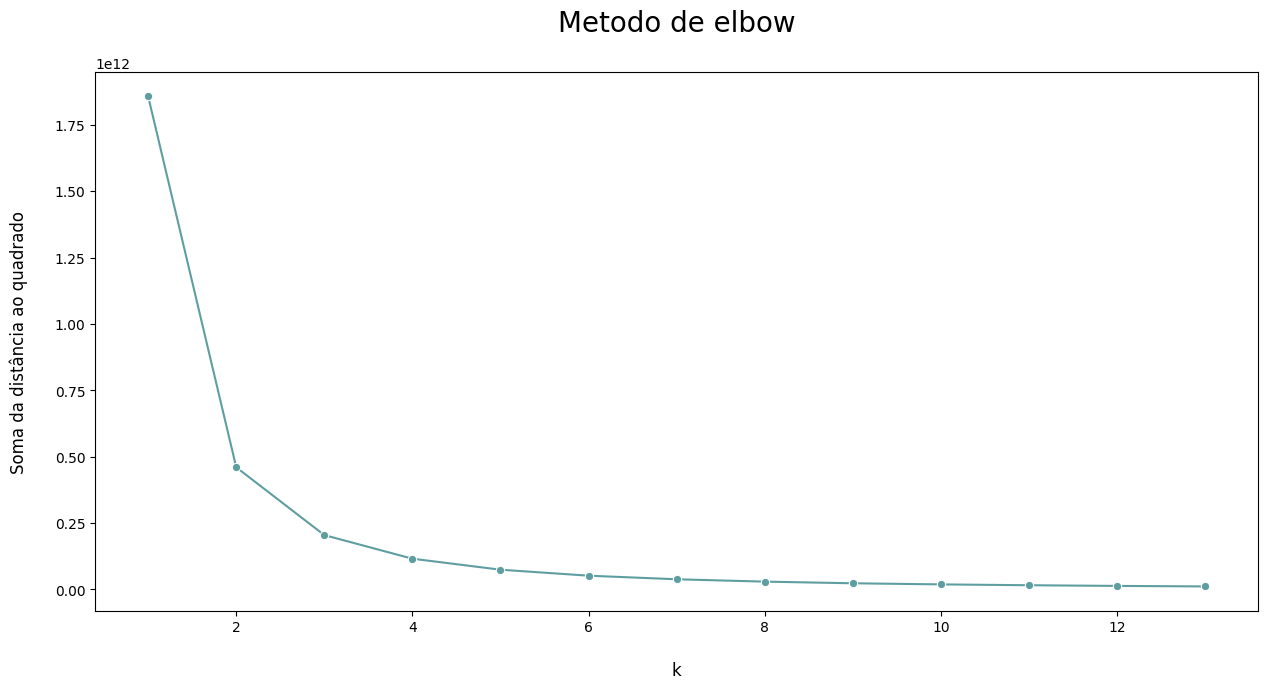

In [251]:
plt.figure(figsize=(15,7)) #plotando o grafico
sns.lineplot(x=num_clusters, y=inertia, color='cadetblue', marker='o') #eixo x os cluster e eixo y os centroids(inertia)
plt.xlabel('\nk', size=12)
plt.ylabel('Soma da distância ao quadrado\n', size=12)
plt.title('Metodo de elbow\n', size=20)
plt.show()